In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Activation
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets, layers, models

In [ ]:
#### Load datSET
(xtrain, ytrain), (xtest, ytest)=mnist.load_data()
print('The shape of xtrain is:', xtrain.shape)
print('The shape of ytrain is:', ytrain.shape)

11490434/11490434 [==============================] - 0s 0us/step
The shape of xtrain is: (60000, 28, 28)
The shape of ytrain is: (60000,)


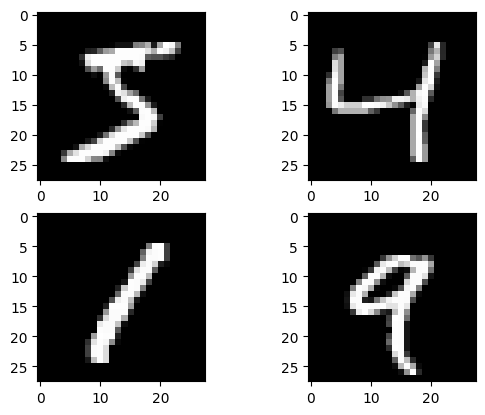

In [ ]:
###### See some plots of the images
plt.subplot(221)
plt.imshow(xtrain[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(xtrain[2],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(xtrain[3],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(xtrain[4],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
xtrain= xtrain.reshape(xtrain.shape[0], 28, 28,1)  # Reshape to 3D array
xtest= xtest.reshape(xtest.shape[0], 28, 28,1)

In [ ]:
unique_classes= np.unique(ytrain)
num_classes= len(unique_classes)
print(f"Number of classes:: {num_classes}")

Number of classes:: 10


In [ ]:

model=Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')

])


model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=16, epochs=20, verbose=1)

Epoch 1/20
3750/3750 [==============================] - 76s 20ms/step - loss: 0.1290 - accuracy: 0.9596 - val_loss: 0.0438 - val_accuracy: 0.9854
Epoch 2/20
3750/3750 [==============================] - 69s 18ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 3/20
3750/3750 [==============================] - 72s 19ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 4/20
3750/3750 [==============================] - 70s 19ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0323 - val_accuracy: 0.9905
Epoch 5/20
3750/3750 [==============================] - 70s 19ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0345 - val_accuracy: 0.9907
Epoch 6/20
3750/3750 [==============================] - 69s 18ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0244 - val_accuracy: 0.9931
Epoch 7/20
3750/3750 [==============================] - 69s 18ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0286 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

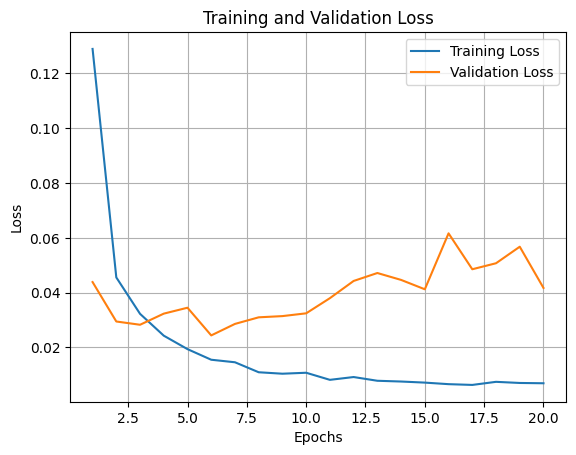

In [ ]:
##### access the training history
train_loss=history.history['loss']
val_loss=history.history['val_loss']

######## plot the training and validation loss over epochs

epochs= range(1, len(train_loss)+1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs,val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
########See train and test accuracy
scores=model.evaluate(xtrain,ytrain)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))
scores=model.evaluate(xtest,ytest)
print('testing Accuracy: %.2f%%\n' % (scores[1]*100))

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0019 - accuracy: 0.9995
Training Accuracy: 99.95%

313/313 [==============================] - 4s 12ms/step - loss: 0.0417 - accuracy: 0.9932
testing Accuracy: 99.32%

